# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_f20/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,805,81,43,68,148,64,7,150,45,19,144,175,330,171,80,1,2,182,185
1,481,104,54,91,209,67,11,218,31,24,170,223,697,196,74,4,21,187,196
2,70,96,55,98,161,54,10,215,31,24,175,226,683,221,76,3,6,185,193
3,419,93,34,72,144,56,6,133,50,18,123,158,263,125,63,5,20,200,206
4,418,87,43,70,169,72,7,152,44,19,145,177,341,171,76,6,12,184,187
5,401,85,37,80,158,59,8,153,44,19,126,179,348,136,69,6,21,191,197
6,246,95,36,73,191,73,6,156,41,19,126,184,374,124,71,2,19,199,204
7,241,93,45,73,164,59,7,159,42,20,146,182,379,188,65,11,15,195,201
8,319,102,51,92,194,60,6,220,30,25,162,247,731,209,80,7,7,188,186
9,686,88,40,69,146,59,7,130,51,18,134,147,252,144,64,1,1,193,200


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,429.816029,93.437158,44.672131,81.562842,166.927140,61.355191,8.384335,167.462659,41.238616,20.471767,147.438980,186.916211,432.129326,173.945355,72.435337,6.315118,12.426230,188.723133,195.349727
std,246.678773,8.070524,6.063078,15.565677,31.785236,6.332591,3.905336,32.446657,7.680640,2.516664,14.209923,30.209250,172.151774,32.520245,6.990995,4.891987,8.799289,6.146021,7.492192
min,0.000000,73.000000,33.000000,40.000000,105.000000,48.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,218.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,137.000000,167.000000,319.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,439.000000,93.000000,44.000000,79.000000,164.000000,61.000000,8.000000,156.000000,43.000000,19.000000,146.000000,177.000000,358.000000,172.000000,71.000000,5.000000,11.000000,188.000000,196.000000
75%,645.000000,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,195.000000,46.000000,22.000000,159.000000,214.000000,572.000000,195.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,250.000000,105.000000,55.000000,262.000000,61.000000,28.000000,186.000000,287.000000,987.000000,268.000000,127.000000,21.000000,41.000000,204.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [8]:
### YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

np.unique(y_train)

array(['bus', 'opel', 'saab', 'van'], dtype=object)

In [9]:
for el in enumerate(np.unique(y_train)):
    y_train[y_train == el[1]] = el[0]
    y_test[y_test == el[1]] = el[0]
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [25]:
for i in range(4):
    print('{} class has {} samples\n'.format(i, y_train[y_train==i].size))

0 class has 149 samples

1 class has 137 samples

2 class has 134 samples

3 class has 129 samples



**I scaled all the features in the dataset as they had significant differences in values. Also I replaced the names of target values with digits to have a possibility to work with them. Finally, I checked the balance of classes and it turned out OK.**

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [85]:
### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(tol=1e-3, solver='saga', max_iter=500, multi_class='multinomial')
params = {'penalty':['l1','l2'], 'C':[0.01, 0.1, 1, 10, 100]}
cv = GridSearchCV(lr, params)
cv.fit(X_train, y_train)
print('CV score results:')
print('\n'.join(map(str, list(zip(cv.cv_results_['params'], cv.cv_results_['mean_test_score'])))))
print()
print('BEST C = {}, BEST penalty "{}"'.format(cv.best_params_['C'], cv.best_params_['penalty']))

CV score results:
({'C': 0.01, 'penalty': 'l1'}, 0.2713928273561301)
({'C': 0.01, 'penalty': 'l2'}, 0.637464553794829)
({'C': 0.1, 'penalty': 'l1'}, 0.6775646371976647)
({'C': 0.1, 'penalty': 'l2'}, 0.7285237698081735)
({'C': 1, 'penalty': 'l1'}, 0.7795829858215179)
({'C': 1, 'penalty': 'l2'}, 0.7741451209341117)
({'C': 10, 'penalty': 'l1'}, 0.783185988323603)
({'C': 10, 'penalty': 'l2'}, 0.7795496246872394)
({'C': 100, 'penalty': 'l1'}, 0.7813511259382819)
({'C': 100, 'penalty': 'l2'}, 0.7813511259382819)

BEST C = 10, BEST penalty "l1"


In [166]:
best_lr = LogisticRegression(tol=1e-3, solver='saga', max_iter=500, multi_class='multinomial', C=10, penalty='l1')
best_lr.fit(X_train, y_train)
y_pred_proba = best_lr.predict_proba(X_test)
y_pred = best_lr.predict(X_test)
print('Accuracy = ', best_lr.score(X_test, y_test))
print('F1 score = ', f1_score(y_test, y_pred, average='macro'))

Accuracy =  0.8013468013468014
F1 score =  0.8107623148524391


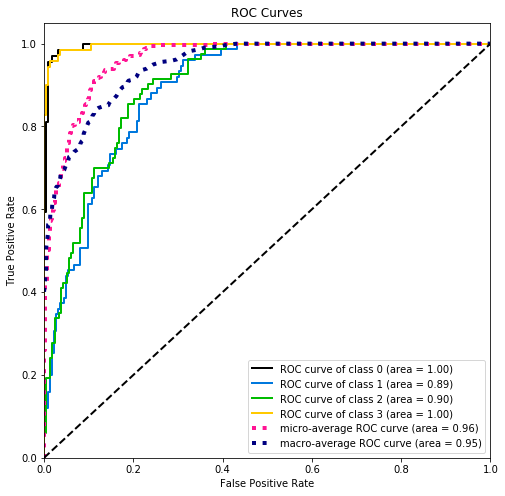

In [164]:
from scikitplot.metrics import plot_roc
plot_roc(y_test, y_pred_proba, figsize=(8,8))

**I've chosen the best penalty and regularisation coefficient for linear regression. And then applied this model to data. In the picture of ROC curve I can see that the model perfectly predict samples from 0 and 3 classes.**

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

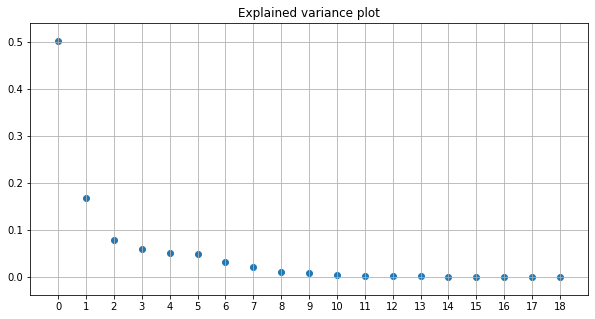

In [109]:
### YOUR CODE HERE
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)

plt.figure(figsize=(10,5))
plt.grid()
plt.xticks(ticks=np.arange(19))
plt.scatter(np.arange(19), pca.explained_variance_ratio_)
plt.title('Explained variance plot')
plt.show()

**The plot shows that the variance of X_train matrix is almost fully explained by first 8 features. That's why in the next section I choose n_components = 10**

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [160]:
### YOUR CODE HERE
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print('Current space explains {}% of variance'.format(pca.explained_variance_ratio_.sum().round(3)))

Current space explains 0.985% of variance


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

BEST С = 1, BEST penalty "l2"

Accuracy =  0.7003367003367004
F1 score =  0.7033021970514622


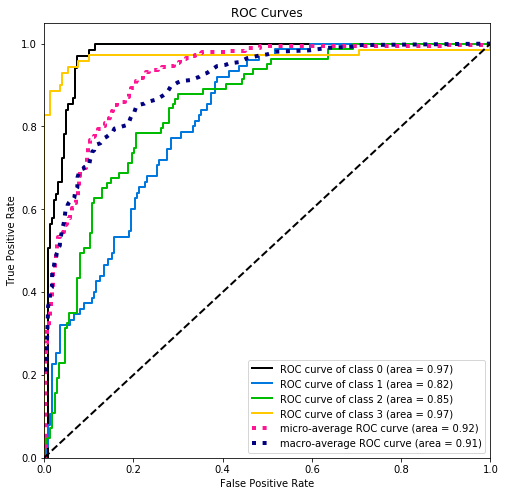

In [165]:
### YOUR CODE HERE
from sklearn.pipeline import Pipeline
n_components = 10
pipe = Pipeline(steps=[('prepr', PCA(n_components=n_components)), 
                       ('est', LogisticRegression(tol=1e-3, solver='saga', max_iter=500, multi_class='multinomial'))])
params_p = {'est__penalty': ['l1', 'l2'], 'est__C': [0.01, 0.1, 1, 10, 100]}

cv_p = GridSearchCV(pipe, params_p)
cv_p.fit(X_train, y_train)
pipe.set_params(est__C = cv_p.best_params_['est__C'], est__penalty = cv_p.best_params_['est__penalty'])
print('BEST С = {}, BEST penalty "{}"'.format(cv_p.best_params_['est__C'], cv_p.best_params_['est__penalty']))
print()

pipe.fit(X_train, y_train)
y_pred_pca = pipe.predict(X_test)
y_pred_proba_pca = pipe.predict_proba(X_test)
print('Accuracy = ', pipe.score(X_test, y_test))
print('F1 score = ', f1_score(y_test, y_pred_pca, average='macro'))

plot_roc(y_test, y_pred_proba_pca, figsize=(8,8))

**We lost the half part of data and metrics became 10% worse**

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE